# Определение перспективного тарифа для телеком компании

Клиентам компании «Мегалайн» (федеральный оператор сотовой связи) предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Требуется: проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### План Исследования

#### Поделим наще исследование на несколько частей.

#### Часть 1. Анализ общей информации
<a href='#Анализ общей информации'> 1.1 Загрузка библиотек, чтение данных и анализ общей информации</a>
#### Часть 2. Предобработка данных
<a href='#2.1 Обработка данных в таблице users'> 2.1 Обработка данных в таблице users</a>

<a href='#2.2 Обработка данных в таблице calls'> 2.2 Обработка данных в таблице calls</a>

<a href='#2.3 Обработка данных в таблице messages'> 2.3 Обработка данных в таблице messages</a>

<a href='#2.4 Обработка данных в таблице internet'> 2.4 Обработка данных в таблице internet</a>

<a href='#2.5 Обработка данных в таблице tariff'> 2.5 Обработка данных в таблице tariff</a>

#### Часть 3. Анализ общего набора данных
<a href='#3.1 Анализ общего набора данных'> 3.1 Анализ общего набора данных</a>

#### Часть 4. Обогащение данных - добавление новых признаков 
<a href='#4.1 Обогащение данных - добавление новых признаков'> 4.1 Обогащение данных - добавление новых признаков</a>

#### Часть 5. Анализ статистических показателей
<a href='#5.1 Анализ статистических показателей'> 5.1 Анализ статистических показателей</a>

#### Часть 6. Провека гипотез
<a href='#6.1 Провека гипотез'> 6.1 Провека гипотез</a>

#### Часть 7. Общий вывод
<a href='#7.1 Общий вывод'> 7.1 Общий вывод</a>

<a id='Анализ общей информации'></a>

### Часть 1. Анализ общей информации. 

In [1]:
# # Для анализа данных будем использовать библиотеку pandas_profiling.
# # Установим библиотеку и изменим версию pandas c которой profiling работает стабильно
# !pip install pandas_profiling==1.4.1
# !pip install pandas==0.25.3
# !pip install cufflinks

In [2]:
# Импортируем библиотеки, с помощью которых будем обрабатывать данные
import pandas_profiling # для анализа статистик и распределений данных
import pandas as pd # для работы с табличными данными
import numpy as np # для работы с вычислительными статистиками
from scipy import stats # для работы со статистиками
from scipy.stats import norm # для отображения нормального распределения на графиках гистограмм

# для визуализации данных
import matplotlib.pyplot as plt 
import seaborn as sns
import cufflinks as cf
%matplotlib inline
cf.go_offline()

# Настройки для печати нескольких выводов данных в одной ячейке
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime # для формирования даты

# Установка настроек для отображения всех колонок при печати
pd.set_option('display.max_columns', None)

# для отключения FutureWarning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Прочитаем данные из 5 файлов и запишем каждый в отдельную переменную
# Таблица users (информация о пользователях)
users = pd.read_csv('/datasets/users.csv')
# Таблица calls (информация о звонках)
calls = pd.read_csv('/datasets/calls.csv')
# Таблица messages (информация о сообщениях)
messages = pd.read_csv('/datasets/messages.csv')
# Таблица internet (информация об интернет-сессиях)
internet = pd.read_csv('/datasets/internet.csv')
# Таблица tariffs (информация о тарифах)
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [4]:
# Запусим библиотеку pandas_profiling и посмотрим как выглядят статистики 
a_dict = {'users': users, 'calls': calls, 'messages': messages, 'internet': internet, 'tariffs': tariffs}
for key, value in a_dict.items():
    print('Анализ набора данных ' + key)
    pandas_profiling.ProfileReport(value)

Анализ набора данных users


Number of variables,8
Number of observations,500
Total Missing (%),11.6%
Total size in memory,31.4 KiB
Average record size in memory,64.3 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Анализ набора данных calls


Number of variables,4
Number of observations,202607
Total Missing (%),0.0%
Total size in memory,6.2 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Анализ набора данных messages


Number of variables,3
Number of observations,123036
Total Missing (%),0.0%
Total size in memory,2.8 MiB
Average record size in memory,24.0 B
Numeric,1
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Анализ набора данных internet


Number of variables,5
Number of observations,149396
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,1


Анализ набора данных tariffs


Number of variables,8
Number of observations,2
Total Missing (%),0.0%
Total size in memory,256.0 B
Average record size in memory,128.0 B
Numeric,0
Categorical,0
Boolean,2
Date,0
Text (Unique),1
Rejected,5


In [5]:
# Используем в цикле метод info для определения типов данных признаков по всем таблицам
for key, value in a_dict.items():
    print('Анализ набора данных ' + key)
    value.info()
    print('')

Анализ набора данных users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Анализ набора данных calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Анализ набора данных messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 no

In [6]:
# Проверим категориальные колонки в таблице users на чистоту данных
for column in ['city', 'first_name', 'last_name']:
    print(column)
    users[column].value_counts()
    print('')

city


Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Подольск            1
Химки               1
Иваново             1
Нижневартовск       1
Name: city, Length: 76, dtype: int64


first_name


Радим       6
Леонид      5
Пётр        5
Леон        4
Матвей      4
           ..
Софья       1
Ангелина    1
Игнатий     1
Инесса      1
Леся        1
Name: first_name, Length: 246, dtype: int64


last_name


Андреенко     5
Озерова       3
Абашкина      3
Аничкина      3
Соловьев      3
             ..
Алексеичев    1
Семина        1
Ахматулин     1
Коршунов      1
Медведев      1
Name: last_name, Length: 419, dtype: int64

### Описание данных и выявленных особенностей 

Посмотрим какая информация содержится в колонках в каждой таблице
Ознакомившись с 5 таблицами мы выдим:
    
###    users 
    
    8 колонок и 500 строк
       
    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки  данных)
    city — город проживания пользователя
    tariff — название тарифного плана
    
    int64 (2 колонки)
    object (6 колонок)
    
#### Требуется:  
    1) Преобразовать тип object -> DataTime:
    reg_date, churn_date (в признаках хранится дата)
    2) Заполнить пропущенные значения в колонке churn_date датой 2199-12-31
    
###    calls 
    
    4 колонки и 202607 строк
    
    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
    
    float64 (1 колонка) 
    int64 (1 колонка) 
    object (2 колонки)
    
    В колонке duration 39613(19,6%) нулевых значений. Удалять не будем так как на требуемые для анализа статистики они не повлияют, но для дальнейшего решения задачи оттока клиентов (если будет поставлена такая задача) эти данные могут пригодиться
    
#### Требуется:  
    1) Преобразовать тип object -> DataTime:
    call_date (в признаке хранится дата)
    
    
  
###    messages 
    
    3 колонки и 123036 строк
    
    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

    int64 (1 колонка)
    object (2 колонки)
    
#### Требуется:  
    1) Преобразовать тип object -> DataTime:
    message_date (в признаке хранится дата)    
   
###    internet 
    
    5 колонок и 149396 строк
    
    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя 
    
    float64 (1 колонка)
    int64 (2 колонки)
    object (2 колонки)
    
    В колонке mb_used 19598(13,1%) нулевых значений. Удалять не будем так как на требуемые для анализа статистики они не повлияют, но для дальнейшего решения задачи оттока клиентов (если будет поставлена такая задача) эти данные могут пригодиться
    
#### Требуется:  
    1) Преобразовать тип object -> DataTime:
    session_date (в признаке хранится дата)
    2) Удалить колонку 'Unnamed: 0' так как в соджится индекс преоразованный в колонку
   
###    tariffs
    
    8 колонок и 2 строки
    
    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
    int64 (7 колонок)
    object (1 клонка)
    
#### Требуется:  
    1) Требуется переименовать колонку tariff_name -> tariff для удобства дальнейшего соединения таблиц

    

<a id='2.1 Обработка данных в таблице users'></a>

### Часть 2. Предобработка данных

#### Работа с таблицей users

In [7]:
# Заполним пропущенные значения в колонке churn_date датой 2199-12-31
users['churn_date'] = users['churn_date'].fillna(datetime(2199, 12, 31))

In [8]:
# Преобразуем тип данных object -> DataTime в колонках churn_date и reg_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [9]:
# Проверим, что в данных нет пропусков и типы данных изменены
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<a id='2.2 Обработка данных в таблице calls'></a>

#### Обработка таблицы calls

In [10]:
# Преобразуем тип данных object -> DataTime в колонках churn_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [11]:
# Создадим колонку month и поместим туда порядковые номера месяцев
calls['month'] = calls['call_date'].dt.month

In [12]:
# Округлим минуты до целых чисел в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil)

In [13]:
# Преоразуем колонку duration из float в int
calls['duration'] = calls['duration'].astype('int64')

In [14]:
# Проверим, что типы данных изменены
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


In [15]:
# Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
calls_group = calls.groupby(['user_id', 'month'])['duration'] \
                   .aggregate(['count', 'sum'])\
                   .rename(columns={'count': 'count_calls_per_month', 
                                    'sum': 'duration_calls_per_month'}).reset_index()

calls_group.head()

,user_id,month,count_calls_per_month,duration_calls_per_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


<a id='2.3 Обработка данных в таблице messages'></a>

#### Обработка таблицы  messages

In [16]:
# Преобразуем тип данных object -> DataTime в колонках churn_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [17]:
# Создадим колонку month и поместим туда порядковые номера месяцев
messages['month'] = messages['message_date'].dt.month

In [18]:
# Проверим, что тип данных изменен
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [19]:
# Посчитаем для каждого пользователя количество отправленных сообщений по месяцам
messages_group = messages.groupby(['user_id', 'month'], as_index=False)\
                         .aggregate({'id': 'count'})\
                         .rename(columns={'id': 'count_messages_per_month'})

messages_group.head()

,user_id,month,count_messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<a id='2.4 Обработка данных в таблице internet'></a>

#### Обработка таблицы internet

In [20]:
# Преобразуем тип данных object -> DataTime в колонках churn_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [21]:
# Удалим колонку Unnamed:0
internet.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
# Преоразуем колонку mb_used из float в int
internet['mb_used'] = internet['mb_used'].astype('int64')

In [23]:
# Переведём мегабайты в гигабайты для удобства в дальнейшей работе
internet['gb_used'] = round(internet['mb_used'] / 1024, 2)

In [24]:
# Округлим гагабайты до целых чисел в большую сторону
internet['gb_used'] = internet['gb_used'].apply(np.ceil)

In [25]:
# Создадим колонку month и поместим туда порядковые номера месяцев
internet['month'] = internet['session_date'].dt.month

In [26]:
# Проверим, что типы данных изменены
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
gb_used         149396 non-null float64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


In [27]:
# Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
internet_group = internet.groupby(['user_id', 'month'], as_index=False)\
        .aggregate({'gb_used': 'sum'})\
        .rename(columns={'gb_used': 'sum_gb_per_month'})

internet_group.head()

,user_id,month,sum_gb_per_month
0,1000,5,4.0
1,1000,6,48.0
2,1000,7,27.0
3,1000,8,27.0
4,1000,9,26.0


<a id='2.5 Обработка данных в таблице tariff'></a>

#### Обработка таблицы tariffs

In [28]:
# Переименуем колонку tariff_name -> tariff
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace = True)

### Вывод

Произведена обработка таблиц и приведение их к удобному виду для дальнейшей работы. 

В колонке users все пропуски заполнили значением out_of_range. 

В таблице calls округлили минуты вверх до целого значения. Изменили тип данных с дробных на целочисленные. 

В таблице internet перевели мегабайты в гигабайты и округлили их вверх до целого значения. Изменили тип данных с дробных на целочисленные. 

Во всех таблицах, кроме tariffs, сгруппированные по месяцам наборы данных. 

В таблице tariffs для удобства переименовали колонку tariff_name на tariff.

<a id='3.1 Анализ общего набора данных'></a>

### Часть 3. Анализ общего набора данных

In [29]:
# Соединим все таблицы в общий набор данных
df = pd.merge(calls_group, messages_group, on=(['user_id', 'month']), how ='outer')
df = pd.merge(df, internet_group, on=(['user_id', 'month']), how ='outer')
df = pd.merge(df, users, on=('user_id'), how ='outer')
df = pd.merge(df, tariffs, on=('tariff'), how ='outer')

In [30]:
# Посмотрим общую информацию по получившемуся набору данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                     3216 non-null int64
month                       3214 non-null float64
count_calls_per_month       3174 non-null float64
duration_calls_per_month    3174 non-null float64
count_messages_per_month    2717 non-null float64
sum_gb_per_month            3203 non-null float64
age                         3216 non-null int64
churn_date                  3216 non-null datetime64[ns]
city                        3216 non-null object
first_name                  3216 non-null object
last_name                   3216 non-null object
reg_date                    3216 non-null datetime64[ns]
tariff                      3216 non-null object
messages_included           3216 non-null int64
mb_per_month_included       3216 non-null int64
minutes_included            3216 non-null int64
rub_monthly_fee             3216 non-null int64
rub_per_gb                  3216 non-null int

In [31]:
# Заменим пропуски на ноль
df = df.fillna(0)

In [32]:
# Посмотрим на строки с пропусками в колонке month
df.query('month == 0')

,user_id,month,count_calls_per_month,duration_calls_per_month,count_messages_per_month,sum_gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,0.0,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,0.0,0.0,0.0,0.0,0.0,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [33]:
# Для пользователей, которые оформили тариф в декабре и не успели воспользоваться услугами, 
# заполним колонку month значением месяца регистрации
df.loc[df['month'] == 0, 'month'] = 12

### Вывод

Для удобства дальнейших расчётов таблицы сведены в общую. Заполнены пропуски, образовавшиеся после склейки. 
В процессе были выявлены два пользователя, которые приобрели тарифы в декабре и не пользовались ими.

<a id='4.1 Обогащение данных - добавление новых признаков'></a>

### Часть 4. Обогащение данных - добавление новых признаков

In [34]:
# Переведём мегабайты в гигабайты в колонке gb_per_month_included
df['gb_per_month_included'] = round(df['mb_per_month_included'] / 1024, 2)

In [35]:
# Создадим колонки с перерасходом минут, смс, гигабайт
df['out_tarif_minutes'] = df['duration_calls_per_month'] - df['minutes_included']
df['out_tarif_sms'] = df['count_messages_per_month'] - df['messages_included']
df['out_tarif_internet'] = df['sum_gb_per_month'] - df['gb_per_month_included']

In [36]:
# Получившиеся отрицательные значения (недоиспользованные лимиты) зануляем
for column in ['out_tarif_minutes', 'out_tarif_sms', 'out_tarif_internet']:
    df.loc[df[column] < 0 , column] = 0

In [37]:
# Посчитаем по месяцам стоимость перерахода интернет трафика, смс, минут
df['sum_prise_out_tarif_internet'] = df['out_tarif_internet'] * df['rub_per_gb']
df['sum_prise_out_tarif_sms'] = df['out_tarif_sms'] * df['rub_per_message']
df['sum_prise_out_tarif_minutes'] = df['out_tarif_minutes'] * df['rub_per_minute']

In [38]:
# Рассчитаем общую прибыль по клиентам в месяц 
df['profit'] = df['sum_prise_out_tarif_internet'] + df['sum_prise_out_tarif_sms'] + df['sum_prise_out_tarif_minutes'] + df['rub_monthly_fee']

### Вывод

Рассчитан перерасход пользователями минут, смс, гигабайт. Рассчитана прибыль по каждому пользователю в месяц.

<a id='5.1 Анализ статистических показателей'></a>

### Часть 5. Анализ статистических показателей

In [39]:
# Посчитаем среднее количество, дисперсию и стандартное отклонение
# для показателей: количество минут разговора, количество сообщений и объём интернет-трафика
# в разрезе тарифов

df.groupby('tariff')\
        .aggregate({'sum_gb_per_month': ['mean', np.var, 'std'],
                    'duration_calls_per_month': ['mean', 'var', 'std'],
                    'count_messages_per_month': ['mean', 'var', 'std']})

sum_gb_per_month                        duration_calls_per_month  \
                   mean         var        std                     mean   
tariff                                                                    
smart         42.144843  221.923829  14.897108               417.747534   
ultra         37.967546  380.620265  19.509492               526.089249   

                                  count_messages_per_month               \
                  var         std                     mean          var   
tariff                                                                    
smart    36281.393836  190.476754                33.369058   796.955256   
ultra   101052.493549  317.887549                49.313387  2285.417425   

                   
              std  
tariff             
smart   28.230396  
ultra   47.806040

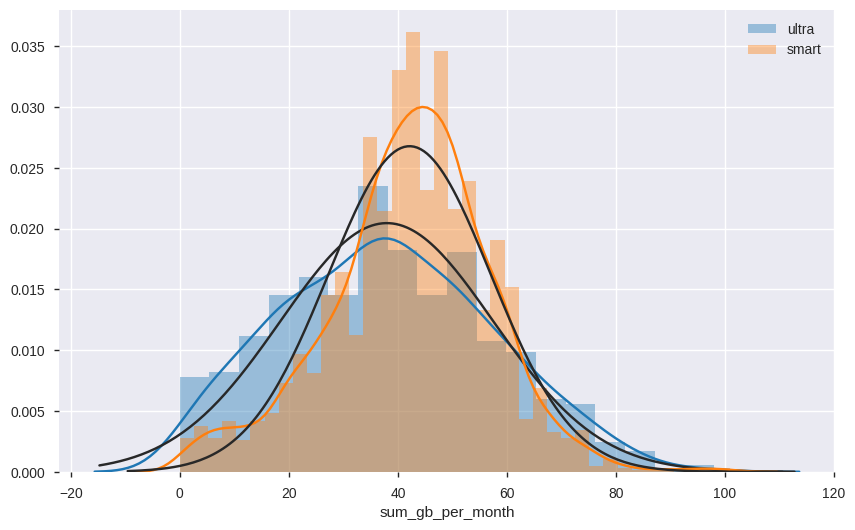

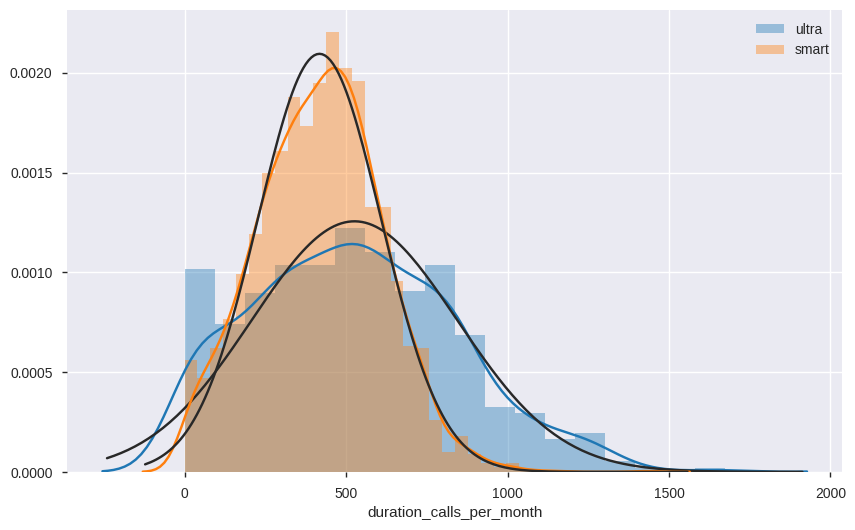

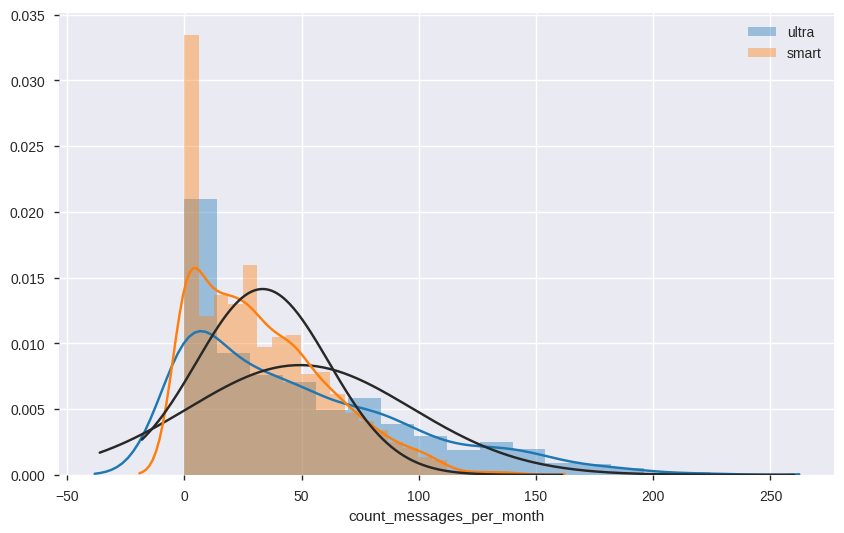

In [40]:
# Построим гистрограммы для показателей количество минут разговора, количество сообщений и объём интернет-трафика
# в разрезе тарифов, с наложением фактического распределения и нормального 

for column in ['sum_gb_per_month', 'duration_calls_per_month', 'count_messages_per_month']:
    fig = plt.figure(figsize=(10,6))
    lst1 = df.query('tariff == "ultra"')[column]
    lst2 = df.query('tariff == "smart"')[column]
    ax1 = sns.distplot(lst1, label='ultra', fit=norm)
    ax2 = sns.distplot(lst2, label='smart', fit=norm)
    ax3 = plt.legend()
    plt.show()   

### Вывод

Гистограммы расхода интернет трафика и использованных минут имет распределения близкие к нормальному. 
Гистограммы количества сообщений имеет ярковыраженную правостороннюю ассиметрию с "тяжелым хвостом".

<a id='6.1 Провека гипотез'></a>

### Часть 6. Провека гипотез

In [41]:
# Посмотрим на средние показатели выручки в разрезе тарифов
df.groupby('tariff', as_index=False)\
        .aggregate({'profit': 'mean'})

,tariff,profit
0,smart,6194.305381
1,ultra,3823.630832


Сформулируем гипотезы для проверки:   
    нулевая гипотеза H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается  
    альтернативная гипотеза H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  

Чтобы проверить гипотезу о равенстве среднего двух выборок, применим метод scipy.stats.ttest_ind - двухсторонний тест, поскольку нам не требуется сравнивать динамику среднего значения.

In [42]:
# Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
# уровень статистической значимости установим в значении 0.05 (порог 5% считается общепринятиым)
# если p-value окажется меньше него - отвергнем нулевую гипотезу

subdf_1 = df.query('tariff == "ultra"')['profit']
subdf_2 = df.query('tariff == "smart"')['profit']

alpha = .05 

results = stats.ttest_ind(subdf_1, subdf_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.866003151192882e-110
Отвергаем нулевую гипотезу


In [43]:
# Для проверки гипотезы о различии средней выручки пользователей разных регионов созданим столбец city_group
# для пользователей живущих не в Москве, будем проставлять значение 'другой регион'
def city_group(city):
    if city == 'Москва':
        return 'Москва'
    return 'другой регион'

In [44]:
# Применяем функцию get_group к данным колонки city. Результат сохраняем в колонке city_group
df['city_group'] = df['city'].apply(city_group)
df.head()

,user_id,month,count_calls_per_month,duration_calls_per_month,count_messages_per_month,sum_gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,out_tarif_minutes,out_tarif_sms,out_tarif_internet,sum_prise_out_tarif_internet,sum_prise_out_tarif_sms,sum_prise_out_tarif_minutes,profit,city_group
0,1000,5.0,22.0,159.0,22.0,4.0,52,2199-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,другой регион
1,1000,6.0,43.0,172.0,60.0,48.0,52,2199-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0,0.0,0.0,18.0,2700.0,0.0,0.0,4650.0,другой регион
2,1000,7.0,47.0,340.0,75.0,27.0,52,2199-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,другой регион
3,1000,8.0,52.0,408.0,81.0,27.0,52,2199-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,другой регион
4,1000,9.0,58.0,466.0,57.0,26.0,52,2199-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,другой регион


In [45]:
# Посчитаем отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов
df.groupby('city_group', as_index=False)\
        .aggregate({'profit': 'mean'})

,city_group,profit
0,Москва,5357.761047
1,другой регион,5493.208829


Сформулируем гипотезы для проверки:   
    нулевая гипотеза H₀: средняя выручка пользователей из Москвы и других регионов не отличается  
    альтернативная гипотеза H₁: средняя выручка пользователей из Москвы и других регионов отличается  

Чтобы проверить гипотезу о равенстве среднего двух выборок, применим метод scipy.stats.ttest_ind - двухсторонний тест, поскольку нам не требуется сравнивать динамику среднего значения.

In [46]:
# Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
# уровень статистической значимости установим в значении 0.05 (порог 5% считается общепринятиым)
# если p-value окажется меньше него - отвергнем нулевую гипотезу

subdf_1 = df.query('city_group == "Москва"')['profit']
subdf_2 = df.query('city_group == "другой регион"')['profit']

alpha = .05 

results = stats.ttest_ind(subdf_1, subdf_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2975061104442491
Не получилось отвергнуть нулевую гипотезу


### Вывод 

Сформулированы и проверены гипотезы.  
В случае первой нипотезы нулевая была отвергнута, в случае второй - нулевую гитопезу отвергнуть не удалось.

<a id='7.1 Общий вывод'></a>

### Часть 7. Общий вывод

Было проанализировано пять наборов данных, которые совокупно отображали поведение клиентов сотовой связи по двум тарифным планам за 2018 год. 

В ходе анализа было сформулировано две гипотезы для выявления выгодного тарифа для компании:  
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  

Использование статистических тестов показало, что тарифные планы «Ультра» и «Смарт» статистически в среднем приносят одинаковую выручку. А средняя выручка Москвы и регионов статистически не отличается.